# Heart Disease Prediction

In [5]:
# Data manipulation and analysis
import pandas as pd

# Scientific computing
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [7]:
file_path = 'https://raw.githubusercontent.com/Nipun44/FDM_project/main/Dataset.csv?token=GHSAT0AAAAAACINAATNKXT3GTLYAYFZEFBYZJFIVCQ'  # Replace 'path_to_your_dataset' with the actual path
heart_data = pd.read_csv(file_path)

In [8]:
heart_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [9]:
heart_data.head(16)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [10]:
heart_data.drop('education', axis = 1, inplace = True)

In [11]:
null_values = heart_data.isnull().sum()

In [13]:
null_values

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [14]:
heart_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
heart_data = heart_data.rename(columns={"BPMeds": "blood pressure medication", "totChol": "cholesterol level" })

In [16]:
data_types = heart_data.dtypes

In [17]:
data_types

male                           int64
age                            int64
currentSmoker                  int64
cigsPerDay                   float64
blood pressure medication    float64
prevalentStroke                int64
prevalentHyp                   int64
diabetes                       int64
cholesterol level            float64
sysBP                        float64
diaBP                        float64
BMI                          float64
heartRate                    float64
glucose                      float64
TenYearCHD                     int64
dtype: object

In [55]:
null_values = heart_data.isnull().sum()

In [56]:
null_values

male                         0
age                          0
currentSmoker                0
cigsPerDay                   0
blood pressure medication    0
prevalentStroke              0
prevalentHyp                 0
diabetes                     0
cholesterol level            0
sysBP                        0
diaBP                        0
BMI                          0
heartRate                    0
glucose                      0
TenYearCHD                   0
dtype: int64

## Cleaning

In [40]:
#remove non values

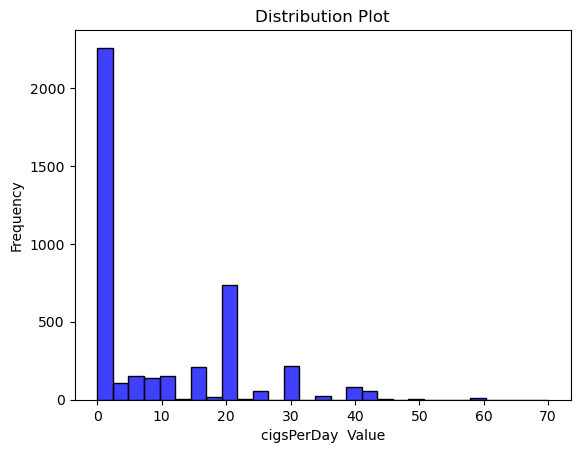

In [58]:
import seaborn as sns

# Sample data
data = heart_data.cigsPerDay 

# Create a distribution plot
sns.histplot(data, color='blue')

# Add labels and title
plt.xlabel('cigsPerDay  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [59]:
heart_data['cigsPerDay'].fillna(heart_data['cigsPerDay'].median() , inplace=True)
null_values = heart_data.isnull().sum()
null_values

male                         0
age                          0
currentSmoker                0
cigsPerDay                   0
blood pressure medication    0
prevalentStroke              0
prevalentHyp                 0
diabetes                     0
cholesterol level            0
sysBP                        0
diaBP                        0
BMI                          0
heartRate                    0
glucose                      0
TenYearCHD                   0
dtype: int64

In [60]:
count_bpm_zero = (heart_data['blood pressure medication'] == 1).sum()

In [61]:
count_bpm_zero

124

In [62]:
heart_data['blood pressure medication'].fillna(heart_data['blood pressure medication'].median() , inplace=True)

In [63]:
count_bpm_zero = (heart_data['blood pressure medication'] == 0).sum()

In [64]:
count_bpm_zero

4113

In [65]:
null_values = heart_data.isnull().sum()
null_values

male                         0
age                          0
currentSmoker                0
cigsPerDay                   0
blood pressure medication    0
prevalentStroke              0
prevalentHyp                 0
diabetes                     0
cholesterol level            0
sysBP                        0
diaBP                        0
BMI                          0
heartRate                    0
glucose                      0
TenYearCHD                   0
dtype: int64

In [66]:
heart_data["cholesterol level"].fillna(heart_data['cholesterol level'].mean(),inplace=True)

In [67]:
null_values = heart_data.isnull().sum()
null_values

male                         0
age                          0
currentSmoker                0
cigsPerDay                   0
blood pressure medication    0
prevalentStroke              0
prevalentHyp                 0
diabetes                     0
cholesterol level            0
sysBP                        0
diaBP                        0
BMI                          0
heartRate                    0
glucose                      0
TenYearCHD                   0
dtype: int64

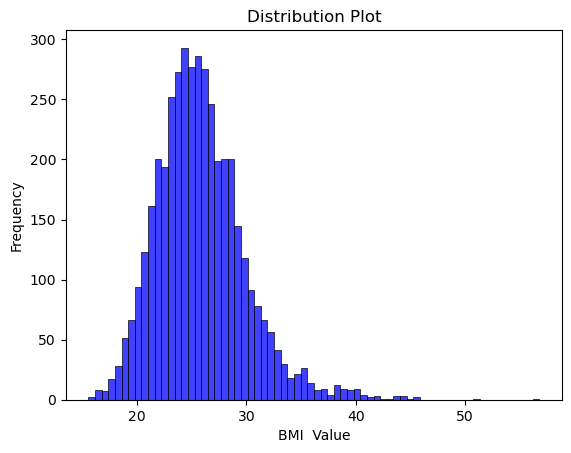

In [68]:
bmi = heart_data.BMI                  

# Create a distribution plot
sns.histplot(bmi, color='blue')

# Add labels and title
plt.xlabel('BMI  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [69]:
heart_data["BMI"].fillna(heart_data['BMI'].mean(),inplace=True)
null_values = heart_data.isnull().sum()
null_values

male                         0
age                          0
currentSmoker                0
cigsPerDay                   0
blood pressure medication    0
prevalentStroke              0
prevalentHyp                 0
diabetes                     0
cholesterol level            0
sysBP                        0
diaBP                        0
BMI                          0
heartRate                    0
glucose                      0
TenYearCHD                   0
dtype: int64

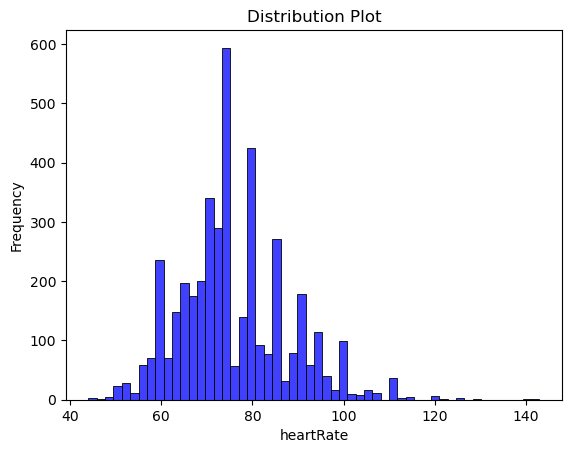

In [54]:
heartRate = heart_data.heartRate                              

# Create a distribution plot
sns.histplot(heartRate, color='blue')

# Add labels and title
plt.xlabel('heartRate')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [70]:
heart_data["heartRate"].fillna(heart_data['heartRate'].mean(),inplace=True)
null_values = heart_data.isnull().sum()
null_values

male                         0
age                          0
currentSmoker                0
cigsPerDay                   0
blood pressure medication    0
prevalentStroke              0
prevalentHyp                 0
diabetes                     0
cholesterol level            0
sysBP                        0
diaBP                        0
BMI                          0
heartRate                    0
glucose                      0
TenYearCHD                   0
dtype: int64

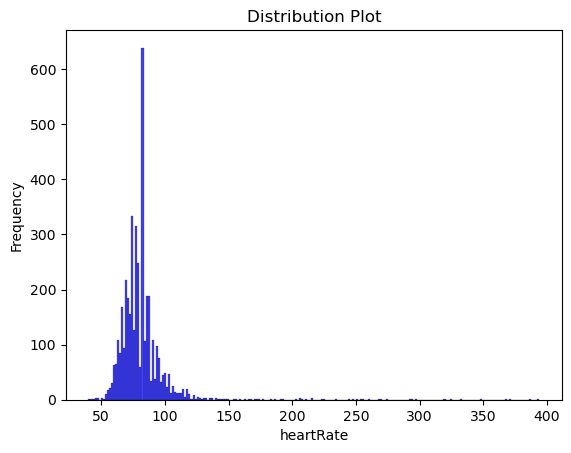

In [71]:
glucose= heart_data.glucose                                          

# Create a distribution plot
sns.histplot(glucose, color='blue')

# Add labels and title
plt.xlabel('heartRate')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [72]:
heart_data

,male,age,currentSmoker,cigsPerDay,blood pressure medication,prevalentStroke,prevalentHyp,diabetes,cholesterol level,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


In [73]:
heart_data["glucose"].fillna(heart_data['glucose'].mean(),inplace=True)
null_values = heart_data.isnull().sum()
null_values

male                         0
age                          0
currentSmoker                0
cigsPerDay                   0
blood pressure medication    0
prevalentStroke              0
prevalentHyp                 0
diabetes                     0
cholesterol level            0
sysBP                        0
diaBP                        0
BMI                          0
heartRate                    0
glucose                      0
TenYearCHD                   0
dtype: int64

In [74]:
nan_rows = heart_data[heart_data.isna().any(axis=1)]
heart_data = heart_data.dropna()  # Removes rows with NaN values
heart_data =heart_data.fillna(0)  # Fills NaN values with 0

## Model Building

In [75]:
X=heart_data.iloc[:,:-1].values
y=heart_data.iloc[:,-1].values

In [76]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest Classifier


In [77]:
# Scale the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier 

model= RandomForestClassifier(n_estimators= 10, criterion="entropy") 

model.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [84]:

# Make predictions on the test set
y_pred = model.predict(X_test)

In [85]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [86]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [87]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8337264150943396
